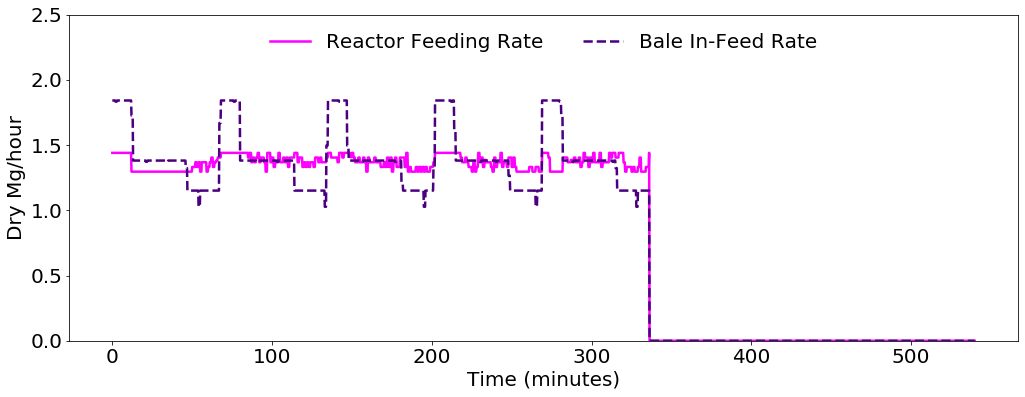

In [41]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 21 17:02:10 2020

@author: Dahui, Tanveer Hossain Bhuiyan
"""
import copy
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# Read Parameter Data
file = open(r'/Users/Kucuksayacigil/Dropbox/INL Postdoc/Documentation/Paper writing 2/Third revision/model_output_optimal.txt')
listInput = file.readlines()
inFlow, outFlow, metering, storage, pelletFlow = [], [], [], [], []
moistureIndex, biomassIndex = 3, 1 # ToDo: Make sure to change this biomassIndex to match the number of biomass in the sequence
tempList = []
for i in range(len(listInput)):
    if listInput[i][0] == 'R':
        keyName = listInput[i].strip()
    else:
        if keyName == 'RInputFlow':
            if listInput[i][0] == 'N':
                inFlow.append(copy.deepcopy(tempList))
                tempList[:] = []
            else:
                tempList.append(listInput[i].split())
            #print(tempList)
        elif keyName == 'ROutFlow':
            if listInput[i][0] == 'N':
                outFlow.append(copy.deepcopy(tempList))
                tempList[:] = []
            else:
                tempList.append(listInput[i].split())
        elif keyName == 'RMetering':
            if listInput[i][0] == 'N':
                metering.append(copy.deepcopy(tempList))
                tempList[:] = []
            else:
                tempList.append(listInput[i].split())
        elif keyName == 'RStorages':
            if listInput[i][0] == 'N':
                storage.append(copy.deepcopy(tempList))
                tempList[:] = []
            else:
                tempList.append(listInput[i].split())
        else:
            if listInput[i][0] == 'N':
                pelletFlow.append(copy.deepcopy(tempList))
                tempList[:] = []
            else:
                tempList.append(listInput[i].split())
file.close()
timeIndex = len(outFlow[0][0])
# print(timeIndex)
'''
sequenceList = [[0,0],[1,0],[1,0],[2,0],[0,0],[1,0],[1,0],[2,0],[0,0],[1,0],[1,0],[2,0],[0,0],[1,0],[1,0],[2,0],[0,0],[1,0],[1,0],[2,0],\
                [0,0],[1,0],[1,0],[2,0],[0,0],[1,0],[1,0],[2,0],[0,0],[1,0],[1,0],[2,0],[0,0],[1,0],[1,0],[2,0],[0,0],[1,0],[1,0],[2,0]]
'''

processTime = [[21, 21, 21, 21], [33, 33, 33, 33], [59, 59, 59, 59]] # not needed  anymore
    
#print(metering)
#print(storage)
sumInvMetering = sum(float(metering[s][b][t]) for s in range(moistureIndex) for b in range(biomassIndex) for t in range(timeIndex))
aveInvMetering = sumInvMetering / timeIndex
maxInvMetering = max(sum(float(metering[s][b][t]) for s in range(moistureIndex) for b in range(biomassIndex)) for t in range(timeIndex))
#print(aveInvMetering,maxInvMetering
sumInvStorage1 = sum(float(storage[0][s][t]) for s in range(moistureIndex) for t in range(timeIndex)) 
aveInvStorage1 = sumInvStorage1 / timeIndex
maxInvStorage1 = max(sum(float(storage[0][s][t]) for s in range(moistureIndex)) for t in range(timeIndex)) 
#print(aveInvStorage1,maxInvStorage1)
# ToDo: comment out the next 12 lines (upto print(aveInvStorage4,maxInvStorage4)) when running for single biomass
'''
sumInvStorage2 = sum(float(storage[1][s][t]) for s in range(moistureIndex) for t in range(timeIndex)) 
aveInvStorage2 = sumInvStorage2 / timeIndex
maxInvStorage2 = max(sum(float(storage[1][s][t]) for s in range(moistureIndex)) for t in range(timeIndex)) 
#print(aveInvStorage2,maxInvStorage2)
sumInvStorage3 = sum(float(storage[2][s][t]) for s in range(moistureIndex) for t in range(timeIndex)) 
aveInvStorage3 = sumInvStorage3 / timeIndex
maxInvStorage3 = max(sum(float(storage[2][s][t]) for s in range(moistureIndex)) for t in range(timeIndex)) 
'''
#print(aveInvStorage3,maxInvStorage3)
#sumInvStorage4 = sum(float(storage[3][s][t]) for s in range(moistureIndex) for t in range(timeIndex))
#aveInvStorage4 = sumInvStorage4 / timeIndex
#maxInvStorage4 = max(sum(float(storage[3][s][t]) for s in range(moistureIndex)) for t in range(timeIndex))
#print(aveInvStorage4,maxInvStorage4)


sumOutFlow = sum(float(outFlow[i][s][t]) for i in range(biomassIndex) for s in range(moistureIndex) for t in range(timeIndex))
aveOutFlow = sumOutFlow / timeIndex
stdOutFlow = math.sqrt(sum(pow(sum(float(outFlow[i][s][t]) for i in range(biomassIndex) for s in range(moistureIndex))-aveOutFlow,2) for t in range(timeIndex)) / timeIndex)
cvOutFlow = stdOutFlow / aveOutFlow

# ToDo: Comment the next line when running for single biomass and uncomment the next next line for single biomass
# the next line is for 4 biomass
# print("aveInvMetering:", aveInvMetering, ",maxInvMetering: ", maxInvMetering,", aveInvStorage1: ", aveInvStorage1,", maxInvStorage1: ", maxInvStorage1, ", aveInvStorage2: ", aveInvStorage2,", maxInvStorage2: ", maxInvStorage2,", aveInvStorage3: ", aveInvStorage3,", maxInvStorage3: ", maxInvStorage3,", aveInvStorage4: ", aveInvStorage4,", maxInvStorage4: ", maxInvStorage4,", cvOutFlow: ", cvOutFlow)
# the next line is for 3 biomass
# print("aveInvMetering:", aveInvMetering, ",maxInvMetering: ", maxInvMetering,", aveInvStorage1: ", aveInvStorage1,", maxInvStorage1: ", maxInvStorage1, ", aveInvStorage2: ", aveInvStorage2,", maxInvStorage2: ", maxInvStorage2,", aveInvStorage3: ", aveInvStorage3,", maxInvStorage3: ", maxInvStorage3,", cvOutFlow: ", cvOutFlow)
# print("Average Inventory metering bin: ", aveInvMetering, ", Max inventory metering bin: ", maxInvMetering,", Average inventory storage bin: ", aveInvStorage1, ", Max inventory storage bin: ", maxInvStorage1, ", coef. of variation: ", cvOutFlow)

#print(aveOutFlow)
#print(sum(float(outFlow[i][s][t]) for i in range(biomassIndex) for s in range(moistureIndex) for t in range(timeIndex)))
#print(sum(pow(sum(float(outFlow[i][s][t]) for i in range(biomassIndex) for s in range(moistureIndex))-aveOutFlow,2) for t in range(timeIndex)) / timeIndex)

maxOut = max(sum(float(outFlow[i][s][t]) for i in range(biomassIndex) for s in range(moistureIndex)) for t in range(timeIndex))
minOut = min(sum(float(outFlow[i][s][t]) for i in range(biomassIndex) for s in range(moistureIndex)) for t in range(timeIndex))
# print(maxOut, minOut, maxOut-minOut)  # max and min reactor feed rates in each time step (15 seconds)
# print("Maximum reactor feed rate: ", maxOut, ", Minimum reactor feed rate: ", minOut, ", Difference between max and min: ", maxOut-minOut)

AshContent = [0.122,0.076,0.064,0.025]
Carbohydrate = [0.574,0.603,0.666,0.817]
AshST, CarboST = [], []
countAsh, countCarbo = 0, 0
for s in range(moistureIndex):
    for t in range(timeIndex):
        if sum(float(outFlow[i][s][t]) for i in range(biomassIndex)) > pow(10,-6):
            AshST.append(sum(float(outFlow[i][s][t]) * AshContent[i] for i in range(biomassIndex)) / sum(float(outFlow[i][s][t]) for i in range(biomassIndex)))
            CarboST.append(sum(float(outFlow[i][s][t]) * Carbohydrate[i] for i in range(biomassIndex)) / sum(float(outFlow[i][s][t]) for i in range(biomassIndex)))
maxAsh, minAsh, maxCarbo,minCarbo = max(AshST), min(AshST), max(CarboST), min(CarboST)
#print(maxAsh,minAsh,maxCarbo,minCarbo)

for j in AshST:
    if j <= 0.074 - pow(10,-6):
        countAsh += 1
for j in CarboST:
    if j >= 0.591 + pow(10,-6):
        countCarbo += 1
#print(countAsh,countCarbo,len(AshST),len(CarboST))

timeX= [t for t in range(2160)]
moistureSet, biomassSet = ['l','m','h'], ['Corn (3-P)','Corn (2-P)','Switchgrass','Miscanthus']
xTicks, xTicksLabel = [], []
for j in range(int(2160/240.0)+1):
    xTicksLabel.append(j)
    xTicks.append(j*240.0)

# reactorFeedRate, reactorFeedRateTotal = [], []
# for t in range(timeIndex): #Total reactor rate
#     reactorRateTimetTotal = sum(float(outFlow[i][s][t]) for i in range(biomassIndex) for s in range(moistureIndex))
#     reactorRateTimetTotalmg = 0.907185 * 4 * 60 * reactorRateTimetTotal
#     reactorFeedRateTotal.append(reactorRateTimetTotalmg)
# for t in range(timeIndex,2160):
#     reactorFeedRateTotal.append(0.0)
# maxFeed, minFeed = [maxOut * 0.907185 * 4 * 60 for t in range(2160)], [minOut * 0.907185 * 4 * 60 for t in range(2160)]
# inputFlow, inputFlowTotal = [], []
# for t in range(timeIndex): #Total input flow
#     inputFlowTotalt = sum(float(inFlow[s][b][t]) for s in range(moistureIndex) for b in range(biomassIndex))
#     inputFlowTotaltmg = 0.907185 * 4 * 60 * inputFlowTotalt
#     inputFlowTotal.append(inputFlowTotaltmg)
# for t in range(timeIndex,2160):
#     inputFlowTotal.append(0.0)
# plt.figure()
# plt.step(timeX,reactorFeedRateTotal,label='Reactor feed rate',where='post')
# plt.step(timeX,inputFlowTotal,label='Input rate',where='post')
# # plt.plot(timeX,maxFeed,color='r',linestyle=':')
# # plt.plot(timeX,minFeed,color='m',linestyle=':')
# plt.xlim(0.0,float(timeIndex))
# plt.ylim(0.0)
# plt.xticks(xTicks,xTicksLabel)
# plt.legend(loc='upper right', frameon=False)
# plt.rcParams.update({'font.size': 18})
# plt.xlabel('Time (h)')
# plt.ylabel('Rate (mg/h)')
# plt.title('Reactor Feed Rate and Input Rate (First?)')

reactorFeedRateA, reactorFeedRateTotalA = [], []
reactorRateTimetTotalA = 0.0
for t in range(timeIndex): #Total reactor rate Ave
    if t % 4 == 0 and t != 0:
        for j in range(4):
            reactorFeedRateTotalA.append(0.907185 * 4 * 60 * reactorRateTimetTotalA / 4)
        reactorRateTimetTotalA = sum(float(outFlow[i][s][t]) for i in range(biomassIndex) for s in range(moistureIndex))
    else:
        reactorRateTimetTotalA += sum(float(outFlow[i][s][t]) for i in range(biomassIndex) for s in range(moistureIndex))
remainPeriod = 0
if timeIndex % 4 == 0:
    remainPeriod = 4
else:
    remainPeriod = timeIndex % 4
for j in range(remainPeriod):
    reactorFeedRateTotalA.append(0.907185 * 4 * 60 * reactorRateTimetTotalA / remainPeriod)
for t in range(timeIndex,2160):
    reactorFeedRateTotalA.append(0.0)
maxFeed, minFeed = [maxOut * 0.907185 * 4 * 60 for t in range(2160)], [minOut * 0.907185 * 4 * 60 for t in range(2160)]
inputFlowA, inputFlowTotalA = [], []
inputFlowTotaltA = 0.0
for t in range(timeIndex): #Total input flow Ave
    if t % 4 == 0 and t != 0:
        for j in range(4):
            inputFlowTotalA.append(0.907185 * 4 * 60 * inputFlowTotaltA / 4)
        inputFlowTotaltA = sum(float(inFlow[s][b][t]) for s in range(moistureIndex) for b in range(biomassIndex))
    else:
        inputFlowTotaltA += sum(float(inFlow[s][b][t]) for s in range(moistureIndex) for b in range(biomassIndex))
for j in range(remainPeriod):
    inputFlowTotalA.append(0.907185 * 4 * 60 * inputFlowTotaltA / remainPeriod)
for t in range(timeIndex,2160):
    inputFlowTotalA.append(0.0)
# plt.figure()
# plt.step(timeX,reactorFeedRateTotalA,label='Reactor feed rate',where='post')
# plt.step(timeX,inputFlowTotalA,label='Input rate',where='post')
# # ToDO: comment out the next two lines when running for random sequence
# # plt.plot(timeX,maxFeed,color='r',linestyle=':')
# # plt.plot(timeX,minFeed,color='m',linestyle=':')
# plt.xlim(0.0,float(timeIndex))
# plt.ylim(0.0)
# plt.xticks(xTicks,xTicksLabel)
# plt.legend(loc='upper right', frameon=False)
# plt.rcParams.update({'font.size': 18})
# plt.xlabel('Time (h)')
# plt.ylabel('Rate (mg/h)')
# plt.title('Reactor Feed Rate and Input Rate')

##### Fikri's addition #########
linew = 2.5
fs = 20
dpi_qual = 900
fig1 = 17
fig2 = 6

fig, ax = plt.subplots(1, 1, figsize = (fig1, fig2))
ax.plot([number / 4 for number in timeX], reactorFeedRateTotalA, linewidth = linew, color = "magenta")
ax.plot([number / 4 for number in timeX], inputFlowTotalA, linewidth = linew, color = "indigo", linestyle = "dashed")
ax.set_xlabel("Time (minutes)", fontsize = fs)
ax.set_ylabel("Dry Mg/hour", fontsize = fs)
ax.set_ylim([0, 2.5])
ax.legend(["Reactor Feeding Rate", "Bale In-Feed Rate"], fontsize  = fs, frameon = False, loc = 'upper center', ncol = 2)
ax.tick_params(axis = "x", labelsize = fs)
ax.tick_params(axis = "y", labelsize = fs)

fig.savefig('/Users/Kucuksayacigil/Dropbox/INL Postdoc/Documentation/Paper writing/Figures/model_output_optimal.pdf', 
            dpi = dpi_qual, bbox_inches = 'tight', pad_inches = 0)
################################

# reactorFeedRateA2, reactorFeedRateTotalA2 = [], []
# reactorRateTimetTotalA2 = 0.0
# for t in range(timeIndex): #Total reactor rate Ave
#     if t % 20 == 0 and t != 0:
#         for j in range(20):
#             reactorFeedRateTotalA2.append(0.907185 * 4 * 60 * reactorRateTimetTotalA2 / 20)
#         reactorRateTimetTotalA2 = sum(float(outFlow[i][s][t]) for i in range(biomassIndex) for s in range(moistureIndex))
#     else:
#         reactorRateTimetTotalA2 += sum(float(outFlow[i][s][t]) for i in range(biomassIndex) for s in range(moistureIndex))
# remainPeriod2 = 0
# if timeIndex % 20 == 0:
#     remainPeriod2 = 20
# else:
#     remainPeriod2 = timeIndex % 20
# for j in range(remainPeriod2):
#     reactorFeedRateTotalA2.append(0.907185 * 4 * 60 * reactorRateTimetTotalA2 / remainPeriod2)
# for t in range(timeIndex,2160):
#     reactorFeedRateTotalA2.append(0.0)
# maxFeed, minFeed = [maxOut * 0.907185 * 4 * 60 for t in range(2160)], [minOut * 0.907185 * 4 * 60 for t in range(2160)]
# inputFlowA2, inputFlowTotalA2 = [], []
# inputFlowTotaltA2 = 0.0
# for t in range(timeIndex): #Total input flow Ave
#     if t % 20 == 0 and t != 0:
#         for j in range(20):
#             inputFlowTotalA2.append(0.907185 * 4 * 60 * inputFlowTotaltA2 / 20)
#         inputFlowTotaltA2 = sum(float(inFlow[s][b][t]) for s in range(moistureIndex) for b in range(biomassIndex))
#     else:
#         inputFlowTotaltA2 += sum(float(inFlow[s][b][t]) for s in range(moistureIndex) for b in range(biomassIndex))
# for j in range(remainPeriod2):
#     inputFlowTotalA2.append(0.907185 * 4 * 60 * inputFlowTotaltA2 / (remainPeriod2))
# for t in range(timeIndex,2160):
#     inputFlowTotalA2.append(0.0)
# plt.figure()
# plt.step(timeX,reactorFeedRateTotalA2,label='Reactor feed rate',where='post')
# plt.step(timeX,inputFlowTotalA2,label='Input rate',where='post')
# # plt.plot(timeX,maxFeed,color='r',linestyle=':')
# # plt.plot(timeX,minFeed,color='m',linestyle=':')
# plt.xlim(0.0,float(timeIndex))
# plt.ylim(0.0)
# plt.xticks(xTicks,xTicksLabel)
# plt.legend(loc='upper right', frameon=False)
# plt.rcParams.update({'font.size': 18})
# plt.xlabel('Time (h)')
# plt.ylabel('Rate (mg/h)')
# plt.title('Reactor Feed Rate and Input Rate (Third?)')

#Plot Inventory Level
# inventoryLevelMetering, inventoryLevelStorage = [], []
# for t in range(timeIndex):
#     inventoryLevelMeteringt = sum(float(metering[s][b][t]) for s in range(moistureIndex) for b in range(biomassIndex))
#     inventoryLevelMetering.append(0.907185 * inventoryLevelMeteringt)
# for t in range(timeIndex,2160):
#     inventoryLevelMetering.append(0.0)
# for b in range(biomassIndex):
#     inventoryLevelStoraget = []
#     for t in range(timeIndex):
#         inventoryLevelStoragets = sum(float(storage[b][s][t]) for s in range(moistureIndex))
#         inventoryLevelStoraget.append(0.907185 * inventoryLevelStoragets)
#     for t in range(timeIndex,2160):
#         inventoryLevelStoraget.append(0.0)
#     inventoryLevelStorage.append(inventoryLevelStoraget)
# plt.figure()
# plt.step(timeX,inventoryLevelMetering,linestyle='dashed',label='metering bin',where='post')
# invCapM = [1.81437 for t in range(2160)]
# plt.plot(timeX,invCapM,color='r',linestyle=':')
# plt.xlim(0.0,float(timeIndex))
# plt.ylim(0.0,2.0)
# plt.xticks(xTicks,xTicksLabel)
# plt.legend(loc='upper right', frameon=False)
# plt.rcParams.update({'font.size': 18})
# plt.xlabel('Time (h)')
# plt.ylabel('Inventory Level (mg)')
# plt.title('Metering Bin')
# plt.figure()
# invCapS = [13.607775 for t in range(2160)]
# plt.step(timeX,inventoryLevelStorage[0],label='Corn Stover (3-P)',where='post',color='r')
# ToDo: Comment out the next 3 lines (upto plt.step(timeX,inventoryLevelStorage[3],label='Miscanthus',where='post',color='lightgreen')) when running for single biomass
# '''
# plt.step(timeX,inventoryLevelStorage[1],label='Corn Stover (2-P)',where='post',color='m')
# plt.step(timeX,inventoryLevelStorage[2],label='Switchgrass',where='post',color='b')
# # plt.step(timeX,inventoryLevelStorage[3],label='Miscanthus',where='post',color='lightgreen')
# '''
# plt.plot(timeX,invCapS,color='r',linestyle=':')
# plt.xlim(0.0,float(timeIndex))
# plt.ylim(0.0,14.0)
# plt.xticks(xTicks,xTicksLabel)
# plt.legend(loc='upper right', frameon=False)
# plt.rcParams.update({'font.size': 18})
# plt.xlabel('Time (h)')
# plt.ylabel('Inventory Level (mg)')
# plt.title('Storage Bins')

# ToDo: Comment out the next 20 lines (upto plt.title('Carbohydrate Content')) when running for single biomass
# '''
# #Carbohydrate
# carboList = []
# carboTar = [59.1 for t in range(2160)]
# for t in range(timeIndex):
#     if sum(float(outFlow[i][s][t]) for i in range(biomassIndex) for s in range(moistureIndex)) >= pow(10,-7):
#         carboList.append(sum(float(outFlow[i][s][t]) * Carbohydrate[i] for i in range(biomassIndex) for s in range(moistureIndex)) / sum(float(outFlow[i][s][t]) for i in range(biomassIndex) for s in range(moistureIndex)) * 100.0)
#     else:
#         carboList.append(59.1)
# for t in range(timeIndex, 2160):
#     carboList.append(0.0)
# plt.figure()
# plt.step(timeX,carboList,label='Carbohydrate',where='post',color='Orange')
# plt.plot(timeX,carboTar,color='r',linestyle=':')
# plt.xlim(0.0,float(timeIndex))
# plt.ylim(50.0,85.0)
# plt.xticks(xTicks,xTicksLabel)
# plt.legend(loc='upper right', frameon=False)
# plt.rcParams.update({'font.size': 18})
# plt.xlabel('Time (h)')
# plt.ylabel('Percentage (%)')
# plt.title('Carbohydrate Content')
# '''

# pelletFlowRate, pelletFlowRateTotal = [], []
# for t in range(timeIndex):
#     pelletFlowRateTotalt = sum(float(pelletFlow[s][b][t]) for s in range(moistureIndex) for b in range(biomassIndex))
#     pelletFlowRateTotaltmg = 0.907185 * 4 * 60 * pelletFlowRateTotalt
#     pelletFlowRateTotal.append(pelletFlowRateTotaltmg)
# for t in range(timeIndex,2160):
#     pelletFlowRateTotal.append(0.0)
# plt.figure()
# plt.step(timeX,pelletFlowRateTotal,label='Pellet equipment Flow Rate',where='post')
# plt.xlim(0.0,float(timeIndex))
# plt.ylim(0.0)
# plt.xticks(xTicks,xTicksLabel)
# plt.legend(loc='upper right', frameon=False)
# plt.rcParams.update({'font.size': 18})
# plt.xlabel('Time (h)')
# plt.ylabel('Rate (mg/h)')
# plt.title('Pellet Equipment Flow Rate')

# pelletFlowRateA, pelletFlowRateTotalA = [], []
# pelletFlowRateTimetTotalA2 = 0.0
# for t in range(timeIndex):
#     if t % 20 == 0 and t != 0:
#         for j in range(20):
#             pelletFlowRateTotalA.append(0.907185 * 4 * 60 * pelletFlowRateTimetTotalA2 / 20)
#         pelletFlowRateTimetTotalA2 = sum(float(pelletFlow[s][b][t]) for s in range(moistureIndex) for b in range(biomassIndex))
#     else:
#         pelletFlowRateTimetTotalA2 += sum(float(pelletFlow[s][b][t]) for s in range(moistureIndex) for b in range(biomassIndex))
# remainPeriod2 = 0
# if timeIndex % 20 == 0:
#     remainPeriod2 = 20
# else:
#     remainPeriod2 = timeIndex % 20
# for j in range(remainPeriod2):
#     pelletFlowRateTotalA.append(0.907185 * 4 * 60 * pelletFlowRateTimetTotalA2 / remainPeriod2)
# for t in range(timeIndex,2160):
#     pelletFlowRateTotalA.append(0.0)
# plt.figure()
# plt.step(timeX,pelletFlowRateTotalA,label='Pellet equipment Flow Rate',where='post')
# plt.xlim(0.0,float(timeIndex))
# plt.ylim(0.0)
# plt.xticks(xTicks,xTicksLabel)
# plt.legend(loc='upper right', frameon=False)
# plt.rcParams.update({'font.size': 18})
# plt.xlabel('Time (h)')
# plt.ylabel('Rate (mg/h)')
# plt.title('Pellet Equipment Flow Rate')
# plt.show()